In [1]:
from benchmark import simple_random_circuit, BenchmarkSimu
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:34: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


### Benchmark simulation times

graphix.pattern.Pattern object with 4 commands and 1 output qubits
[['N', 1], ['E', (0, 1)], ['M', 1, 'XY', -1.6047643648488676, [], [], 6], ['Z', 0, [1]]]
graphix.pattern.Pattern object with 16 commands and 2 output qubits
[['N', 2], ['N', 3], ['N', 4], ['N', 5], ['E', (3, 5)], ['E', (0, 4)], ['E', (2, 3)], ['E', (0, 2)], ['E', (1, 2)], ['M', 1, 'XY', 0, [], []], ['M', 2, 'XY', 0, [], []], ['M', 4, 'XY', -0.6536257874400865, [], [], 6], ['M', 5, 'XY', -0.2362889021777681, [2], [], 6], ['Z', 3, [1, 5]], ['Z', 0, [1, 4]], ['X', 3, [2]]]
graphix.pattern.Pattern object with 20 commands and 3 output qubits
[['N', 3], ['N', 4], ['N', 5], ['N', 6], ['N', 7], ['E', (1, 7)], ['E', (4, 6)], ['E', (2, 5)], ['E', (3, 4)], ['E', (2, 3)], ['E', (0, 3)], ['M', 0, 'XY', 0, [], []], ['M', 3, 'XY', 0, [], []], ['M', 5, 'XY', -0.27459700045472624, [], [], 6], ['M', 6, 'XY', -0.7402857757174639, [3], [], 6], ['M', 7, 'XY', -1.3065524355336158, [], [], 6], ['Z', 4, [0, 6]], ['Z', 2, [0, 5]], ['Z', 1, [7]]

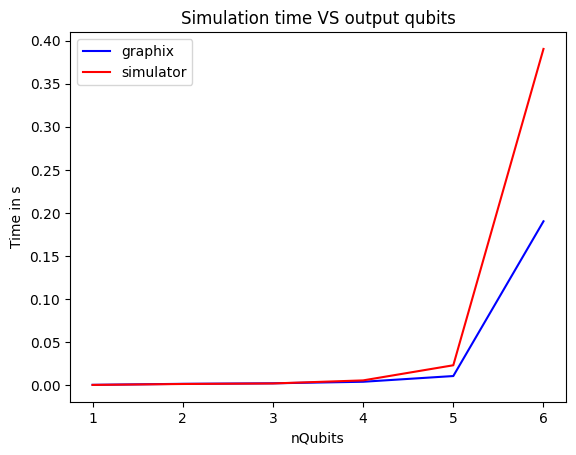

In [2]:
simu_times = []
nQubits = 6
depth = 1

for n in range(1, nQubits + 1):    
    circ = simple_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    print(p)
    print(list(p))
    bench = BenchmarkSimu(p)
    simu_times.append(bench.bench_mbqc_simu())
    print('============================')

x = list(range(1, nQubits + 1))
graphix_simu_times = [simu_times[i]['graphix_simu'] for i in range(len(simu_times))]
simu_times = [simu_times[i]['sv_simu'] for i in range(len(simu_times))]

plt.plot(x, graphix_simu_times, '-b', label='graphix')
plt.plot(x, simu_times, '-r', label='simulator')
plt.legend(loc='upper left')
plt.xlabel('nQubits')
plt.ylabel('Time in s')
plt.title('Simulation time VS output qubits')
plt.show()

### Benchmark command times

Benchmarking MBQC with 1 input qubits
Benchmarking MBQC with 2 input qubits
Benchmarking MBQC with 3 input qubits
Benchmarking MBQC with 4 input qubits
Benchmarking MBQC with 5 input qubits


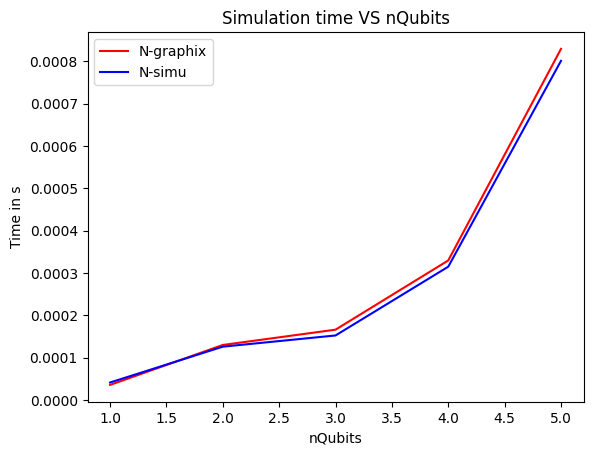

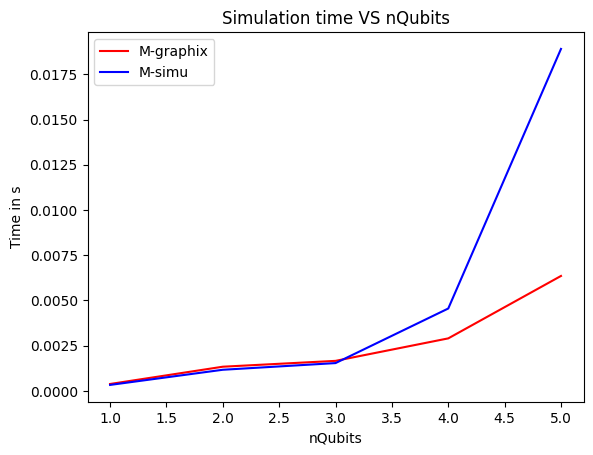

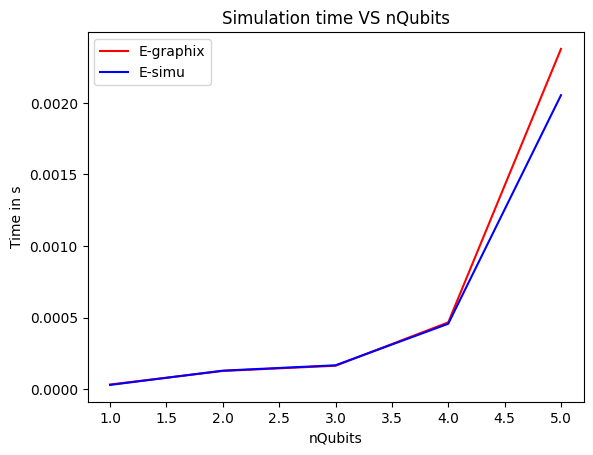

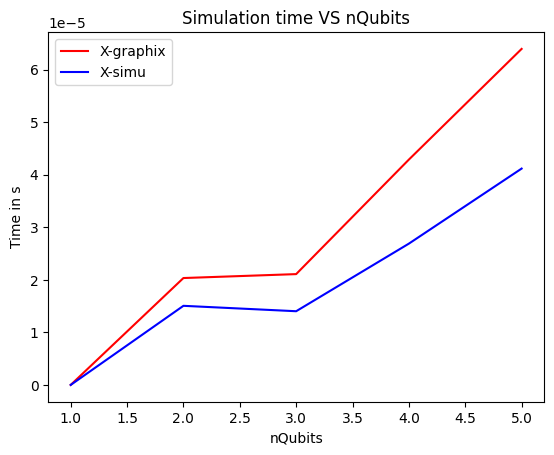

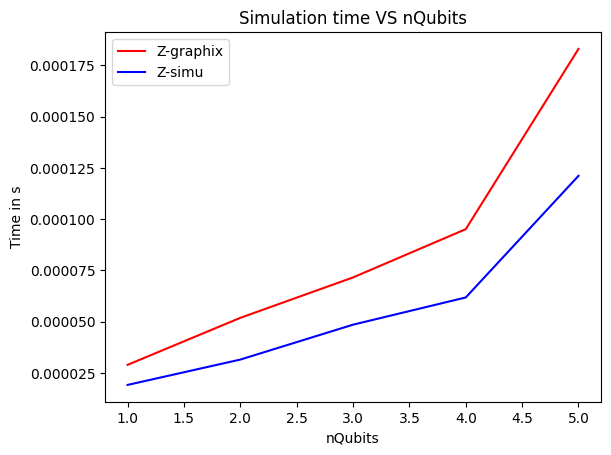

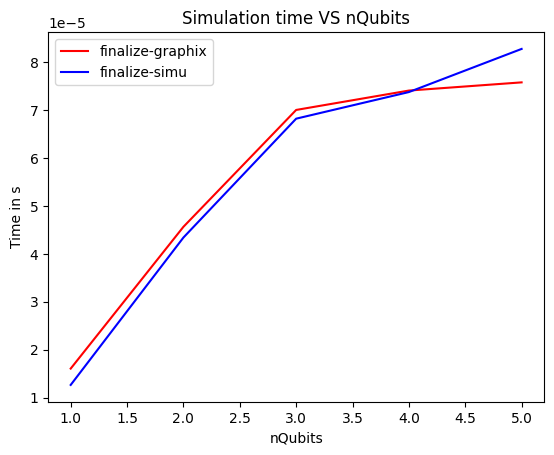

In [7]:
cmd_times = []
nQubits = 5
depth = 1

for n in range(1, nQubits + 1):    
    circ = simple_random_circuit(n, depth)
    p = circ.standardize_and_transpile()
    print(f'Benchmarking MBQC with {n} input qubits')
    bench = BenchmarkSimu(p)
    cmd_times.append(bench.bench_cmd_times(it=500))

x = list(range(1, nQubits + 1))
labels = ['N', 'M', 'E', 'X', 'Z', 'finalize']
graphix_cmd_times = [
    [cmd['N']['graphix'] for cmd in cmd_times],
    [cmd['M']['graphix'] for cmd in cmd_times],
    [cmd['E']['graphix'] for cmd in cmd_times],
    [cmd['X']['graphix'] for cmd in cmd_times],
    [cmd['Z']['graphix'] for cmd in cmd_times],
    [cmd['finalize']['graphix'] for cmd in cmd_times]
]
sv_simu_cmd_times = [
    [cmd['N']['simu'] for cmd in cmd_times],
    [cmd['M']['simu'] for cmd in cmd_times],
    [cmd['E']['simu'] for cmd in cmd_times],
    [cmd['X']['simu'] for cmd in cmd_times],
    [cmd['Z']['simu'] for cmd in cmd_times],
    [cmd['finalize']['simu'] for cmd in cmd_times]
]

for i, label in enumerate(labels):
    plt.plot(x, graphix_cmd_times[i], 'r', label=f'{label}-graphix')
    plt.plot(x, sv_simu_cmd_times[i], 'b', label=f'{label}-simu')
    plt.legend(loc='upper left')
    plt.xlabel('nQubits')
    plt.ylabel('Time in s')
    plt.title('Simulation time VS nQubits')
    plt.show()